In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#통계분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest


import warnings
warnings.filterwarnings("ignore")

## 실습 1. p250
도장공정에서 광택도 불량이 30%가 된다고 한다.\
5대의 차량을 임의로 선택했을 때 불량대수가 각각 0, 1, 2, 3, 4, 5 대가 나올 확률은?

In [2]:
#실습 1
n = 5
for i in range(n+1):
    #이항분포
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


불량대수가 0대일 확률은 0.168,\
1대일 확률은 0.36,\
2대일 확률은 0.309,\
3대일 확률은 0.132, \
4대일 확률은 0.028, \
5대일 확률은 0.002로 \
확률의 합은 1이고 불량대수가 1대일 확률이 가장 높다.

## 실습 2. p265
실습파일 2sample_t_test.csv 에서 Mat_A, Mat_B에 대해 각각 정규성 검정

In [3]:
#실습2
ds = pd.read_csv("221026_Big Data 분석_실습화일/1 Big Data 분석 기초/2sample_t_test.csv")
ds.dropna(axis=0, inplace = True)
ds.head()

Mat_A  Mat_B  Total  Sub
0   73.4   68.7   73.4    1
1   77.0   71.4   77.0    1
2   73.7   69.8   73.7    1
3   73.3   75.3   73.3    1
4   73.1   71.3   73.1    1

In [4]:
data1 = ds['Mat_A']

#정규성 검정
stats.shapiro(data1)

ShapiroResult(statistic=0.906264066696167, pvalue=0.2563020884990692)

In [5]:
data2 = ds['Mat_B']

#정규성 검정
stats.shapiro(data2)

ShapiroResult(statistic=0.9729753732681274, pvalue=0.9169775247573853)

## 실습 3. p268
### 모평균 구간추정
새로운 품종의 감자 20box를 랜덤추출하여 무게를 측정한 결과에서 신품종 배추의 평균 무게에 대한 95% 신뢰구간\
모표준편차 3.8

In [6]:
#실습3
df = pd.DataFrame({"sample": [18,18,20,21,20,23,19,18,17,21,
                              22,20,20,21,20,19,19,18,17,19]})
df.head()

sample
0      18
1      18
2      20
3      21
4      20

In [7]:
#정규분포 구간 추정 함수 실행
lower,upper = stats.norm.interval(0.95,loc=np.mean(df),scale=3.8/np.sqrt(20))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간: ([17.83],[21.17])


- 표본 20 박스의 평균 무게가 유의수준 0.05 하에서 (17.83,21.17) 사이에 있다는 것을 95% 신뢰한다.

## 실습 4. p271
### 모평균 구간추정 - 모표준편차 모르는 경우
기대값 70kg/mm^2, 표본개수 n = 20인 자료로부터 표본평균은 71.50kg/mm^2, 표본표준편차는 1.933kg/mm^2이다.\
모평균값의 95% 신뢰구간을 추정하시오.

In [8]:
df = pd.DataFrame({"sample": [73, 71, 74, 69, 70, 73, 70, 68, 75, 72,
                              70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
df.head()

sample
0      73
1      71
2      74
3      69
4      70

In [9]:
stats.sem(df)

array([0.43225236])

In [10]:
#정규분포 구간 추정 함수 실행
lower,upper = stats.t.interval(0.95,len(df)-1, loc=np.mean(df),scale=stats.sem(df))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간: ([70.6],[72.4])


- 평균 기댓값 70, 표본평균 71.5, 표본표준편차 1.933 일 때 유의수준 0.05 하에서 모평균값은 (70.76, 72.4) 사이에 있음을 95% 신뢰한다.

## 실습 5. p296
### 1-sample t-test
고객서비스센터의 고객만족도 평균은 78이다. 개선활동을 완료한 후 10개의 고객만족도 데이터를 얻었다.\
개선활동이 만족도를 변화시켰는가? (α = 0.05)

<AxesSubplot:>

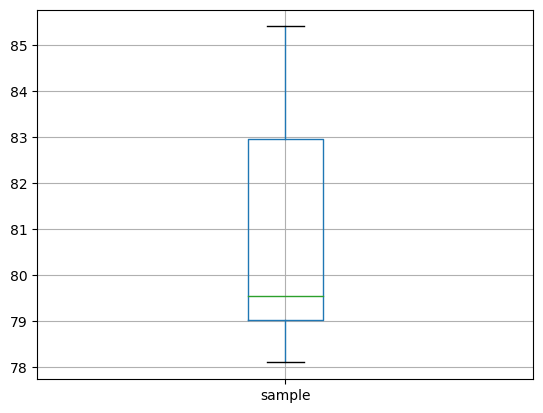

In [11]:
#데이터 직접입력
df = pd.DataFrame({"sample": [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

#박스플랏
df.boxplot(['sample'])

- 박스플랏으로 봤을 때 중앙값이 79.5 근처이고 IQR 범위는 약 79에서 83 정도임을 알 수 있다.
- 또 중앙값이 IQR 박스에서 아래쪽에 위치해 있는 것을 볼 때 전체 박스의 값에서 작은 수의 빈도가 더 많을 것 같다.

#### <정규성 검정>

가설 설정
- H0 : 정규성을 따른다.
- H1 : 정규성을 따르지 않는다.

In [12]:
#정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(df['sample'])
print("statistic={}, p-values={}".format(statistic,p))

statistic=0.8473217487335205, p-values=0.0539751797914505


- 검정통계량 약 0.847
- p-value 약 0.054

-> 유의수준 0.05 하에서 p-value값이 0.054로 유의수준보다 크므로 정규성을 따른다고 할 수 있다.

#### < 1-sample t-test 검정 > 

가설 설정 
- H0 : 고객만족도 변화가 없었다.
- H1 : 고객만족도 변화가 있었다.

In [13]:
t_result = stats.ttest_1samp(df,76.7)

t,p = t_result.statistic.round(3),\
        t_result.pvalue.round(3)

print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계량 : [4.879]
p-value : [0.001]


결론
- p-value값이 0.001로 0.05보다 작기 때문에 유의수준 0.05 하에서 개선활동이 고객만족도 변화를 시켰다고 할 수 있다.(만족도 차이가 있다.)

## 실습 6. p299
### 2-sample t-test
제품을 A공급자와 B공급자로부터 제품을 받아 두께를 측정,\
공급자 간에 모평균 차이가 있다고 할 수 있는가?

가설 설정
- H0 : 공급자간에 두께 평균의 차이가 없다.
- H1 : 공급자간에 두께 평균의 차이가 있다.

(α = 0.05)

<AxesSubplot:>

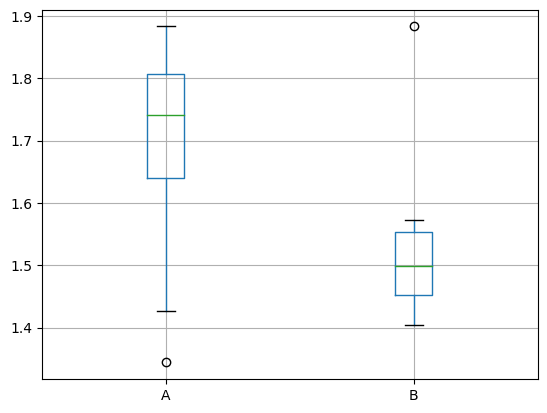

In [14]:
#데이터 직접 입력
df = pd.DataFrame({'A':[1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                   'B':[1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

#Group별 boxplot
df.boxplot(['A','B'])

- 박스플랏을 그려보았을 때 박스 위치의 차이가 겹치는 범위 없이 큰 것 같다.\
 -> 평균의 차이가 있을 것 같다.

#### < 정규성 검정 >
A와 B의 정규성을 각각 검정

In [15]:
# 'A','B' 정규성 검정 : Shaporo-Wilk Test
statistic, p = stats.shapiro(df['A'])
print("A : statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df['B'])
print("B : statistic={}, p-value={}".format(statistic,p))

A : statistic=0.8425754904747009, p-value=0.08004532009363174
B : statistic=0.7734811902046204, p-value=0.014793740585446358


 -> 
B의 p-value가 약 0.015로 정규성이 있다고 할 수 없지만, 정규성을 띈다고 가정하여 다음 검정을 진행하였습니다.

#### < 등분산성 검정 >

In [16]:
#등분산성 검정 
stats.bartlett(df['A'],df['B'])

BartlettResult(statistic=0.42411436523132123, pvalue=0.5148911629500761)

 -> p-value값이 0.05보다 크므로 등분산성을 가진다고 할 수 있어 2-sample t-test를 진행하였습니다.

#### < 2-Sample t-test >

In [17]:
#2-Sample t-test
t_result = stats.ttest_ind(df['A'],df['B'])

#t값, p값 저장
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

#결과 출력
print("2-Sample t-test")
print("t: {}".format(t))
print("p: {}".format(p))

2-Sample t-test
t: 1.7
p: 0.111


결론
- p-value값이 0.111로 0.05보다 작아 두께 평균의 차이가 있다고 할 수 있다.
- 검정통계량이 1.7로 0보다 크므로 A 공급자의 제품의 평균이 크다고 할 수 있다.

## 실습 7. p302
### Paired t-test
회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다. 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

#### <가설 설정>
(α = 0.05)
- H0 : 학원가기 전후로 성적 차이가 없다.
- H1 : 학원가기 전후로 성적 차이가 있다.

<AxesSubplot:>

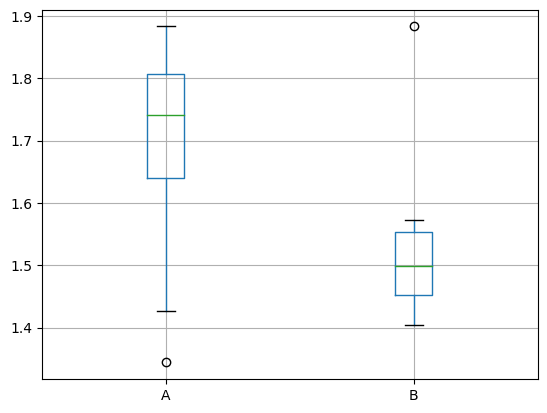

In [18]:
df1 = pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after':[710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

#Group별 boxplot
df.boxplot(['A','B'])

- 박스플랏을 그려보았을 때 박스 범위가 겹치지 않고 중앙값 차이도 있는 것처럼 보임 -> 검정 시 전후 차이가 있을 것 같다.

#### < 정규성 검정 >
A와 B의 정규성을 각각 검정

In [19]:
# 'A','B' 정규성 검정 : Shaporo-Wilk Test
statistic, p = stats.shapiro(df['A'])
print("A : statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df['B'])
print("B : statistic={}, p-value={}".format(statistic,p))

A : statistic=0.8425754904747009, p-value=0.08004532009363174
B : statistic=0.7734811902046204, p-value=0.014793740585446358


정규성 검정을 했을 때 B의 p-value값이 약 0.015로 정규성을 띈다고 볼 수 없다.\
 -> 하지만 정규성을 띈다고 가정하여 다음 검정을 진행하였습니다.

#### < 등분산성 검정 >

In [20]:
#등분산성 검정 
stats.bartlett(df['A'],df['B'])

BartlettResult(statistic=0.42411436523132123, pvalue=0.5148911629500761)

-> p-value값이 0.05보다 크므로 등분산성을 가진다고 할 수 있어 2-sample t-test를 진행하였습니다.

#### < t-검정 >

In [21]:
# paired t-test
t_result = stats.ttest_rel(df1, df2)

# t값, p값 저장
t,p =t_result.statistic.round(3), t_result.pvalue.round(5)

# 값 출략
print("Paired t-test")
print("t: {}".format(t))
print("p: {}".format(p))

Paired t-test
t: [-2.266]
p: [0.04968]


결론
- p-value값이 0.04968로 유의수준인 0.05보다 작아 H0를 기각하고 성적 차이가 있다고 할 수 있다.
- 검정통계량이 약 -2.27로 음수이기 때문에 학원가기 후의 성적이 더 크다고 할 수 있다.

## 실습 8. p307
### 1 Proportion test
동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다. 이 동전은 정상인가를 유의수준 0.05로 검정하라.
p=0.5

#### < 가설 설정 >
- H0 : 비율이 같다. (동전이 정상이다.)
- H1 : 비율이 다르다. (동전이 비정상이다.)

In [22]:
# 실습 8

#변수 선언
count = 40
n_obs = 100
value = 0.5

#비율이 같은지 검정
stat,pval = proportions_ztest(count, n_obs, value)

print("1 proportion test")
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

1 proportion test
z:-2.041
p:0.041


- p-value값이 0.041로 0.05보다 작아 비율이 같다고 할 수 없다.
- 검정통계량이 음수이므로 정상비율보다 작다고 할 수 있다.

## 실습 10. p318
### 동일성 검정
노트북 컴퓨터의 6가지 제품(A,B,C,D,E,F)에 대하여 7가지 제품의 이미지를 중복 선택할 수 있도록 32명의 소비자를 대상으로 설문조사하였다. 각 제품에 대해 이미지에 대해 차이가 있는가?

#### < 가설 설정 >
- H0 : 제품의 이미지 차이가 없다.
- H1 : 제품의 이미지 차이가 있다.

In [ ]:
정규성 검정결과(95% 신뢰수준 사용시) p-value가 0.05보다 크면 정규, 0.05보다 작으면 비정규로 판단
변수 Mat_A의 p-value는 약 0.256이므로 정규분포를 따른다고 판단한다.
#df 생성
df = pd.DataFrame({'A':[18, 1, 8, 7, 10, 9, 10], 'B':[8, 2, 14, 5, 5, 9, 4],
                  'C':[4, 1, 3, 4, 9, 5, 4], 'D':[4, 1, 2, 3, 2, 7, 3],
                  'E':[3, 1, 3, 1, 1, 1, 1], 'F':[3, 25, 8, 10, 2, 1, 7]})

#카이제곱 검정 시행
chi, pval, dof, expected = stats.chi2_contingency(df)

#결과 출력
print("카이제곱검정")
print("chisq: {0:0.3f}".format(chi))
print("p:{0:0.3f}".format(pval))
print("degree pf freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

 -> p-value값이 약 0.000으로 유의수준 0.05보다 작다. 따라서 각 제품의 이미지 차이가 있다고 할 수 있다.

## 실습 11. p325
### ANOVA
철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데, 강종별과 type에 따라 2차정련 시간에 차이가 있는지 검정하라 (유의수준 0.05)

### 1) 강종별 차이 검정
#### < 가설 설정 >
- H0 : 강종별 차이가 없다.
- H1 : 강종별 차이가 있다.

In [39]:
#실습 11
df = pd.read_csv("221026_Big Data 분석_실습화일/1 Big Data 분석 기초/ANOVA.csv")
df

time charge gangjong type
0   32.2      A        a    a
1   30.4      B        a    a
2   33.6      C        a    a
3   36.4      D        a    a
4   33.9      E        a    a
5   34.9      F        a    a
6   33.1      A        b    a
7   29.9      B        b    a
8   31.7      C        b    a
9   27.5      D        b    a
10  34.0      E        b    a
11  30.7      F        b    a
12  32.6      A        c    b
13  32.7      B        c    b
14  29.3      C        c    b
15  25.9      D        c    b
16  31.1      E        c    b
17  23.8      F        c    b
18  26.7      A        d    b
19  28.5      B        d    b
20  30.9      C        d    b
21  26.2      D        d    b
22  32.3      E        d    b
23  23.7      F        d    b

In [40]:
#강종 종류 확인
df['gangjong'].unique()

array(['a', 'b', 'c', 'd'], dtype=object)

- 강종은 a, b, c, d 4가지로 이루어져있음을 확인

<AxesSubplot:>

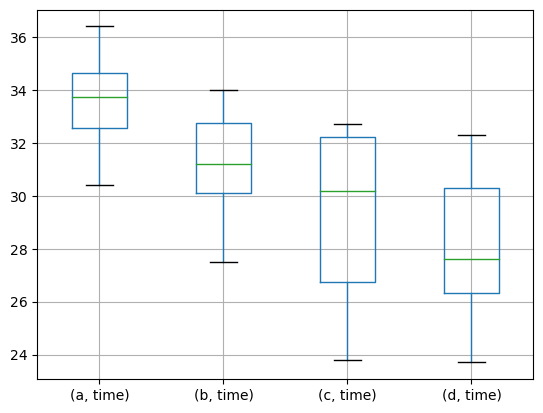

In [41]:
#강종별로 시간의 box plot
df.groupby('gangjong').boxplot(['time'])

In [43]:
statistic, p =stats.shapiro(df[(df.gangjong=='a')]['time'])
print("statistic = {}, p-value={}".format(statistic,p))

statistic, p =stats.shapiro(df[(df.gangjong=='b')]['time'])
print("statistic = {}, p-value={}".format(statistic,p))

statistic, p =stats.shapiro(df[(df.gangjong=='c')]['time'])
print("statistic = {}, p-value={}".format(statistic,p))

statistic, p =stats.shapiro(df[(df.gangjong=='d')]['time'])
print("statistic = {}, p-value={}".format(statistic,p))

stats.levene(df[(df.gangjong=='a')]['time'],df[(df.gangjong=='b')]['time'],df[(df.gangjong=='c')]['time'],df[(df.gangjong=='d')]['time'])

statistic = 0.9879403114318848, p-value=0.983557939529419
statistic = 0.9769707918167114, p-value=0.9355478286743164
statistic = 0.8929420113563538, p-value=0.3338908553123474
statistic = 0.9713904857635498, p-value=0.901641845703125


LeveneResult(statistic=0.9417495009041227, pvalue=0.4390899931524723)

In [45]:
#ANOVA
f_result = stats.f_oneway(df[(df.gangjong=='a')]['time'],df[(df.gangjong=='b')]['time'],df[(df.gangjong=='c')]['time'],df['gangjong']=='d')

f, p = f_result.statistic.round(5), f_result.pvalue.round(5)

print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way
F 통계량 : 1044.24977
p-value : 0.0


<AxesSubplot:>

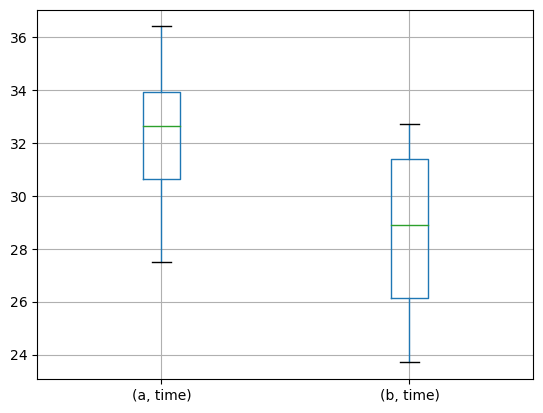

In [27]:
df.groupby('type').boxplot(['time'])

In [28]:
df.groupby('type').head()

time charge gangjong type
0   32.2      A        a    a
1   30.4      B        a    a
2   33.6      C        a    a
3   36.4      D        a    a
4   33.9      E        a    a
12  32.6      A        c    b
13  32.7      B        c    b
14  29.3      C        c    b
15  25.9      D        c    b
16  31.1      E        c    b

In [38]:
statistic, p =stats.shapiro(df[(df.type=='a')]['time'])
print("statistic = {}, p-value={}".format(statistic,p))

statistic, p =stats.shapiro(df[(df.type=='b')]['time'])
print("statistic = {}, p-value={}".format(statistic,p))

stats.levene(df[(df.type=='a')]['time'],df[(df.type=='b')]['time'])

statistic = 0.982139527797699, p-value=0.9907686114311218
statistic = 0.9098271131515503, p-value=0.2122616022825241


LeveneResult(statistic=2.1557191195451235, pvalue=0.1561933555382328)

In [30]:
#ANOVA
f_result = stats.f_oneway(df[(df.type=='a')]['time'],df[(df.type=='b')]['time'])

f, p = f_result.statistic.round(5), f_result.pvalue.round(5)

print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way
F 통계량 : 9.65382
p-value : 0.00514


## 실습 12. p330
### Correlation Analysis
초코칩의 강도와 재료 반죽온도 간에 관계를 분석하기 위한 상관분석을 하세요

#### < 가설 설정 >
- H0 : 상관관계가 없다.
- H1 : 상관관계가 있다.

In [31]:
df1 = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

#상관분석
corr, pval = stats.pearsonr(df1, df2)

print("Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))

Correlation Analysis
corr:-0.723
p-value:0.000


 -> 상관계수가 -0.723이므로 음의 선형관계를 가짐을 알 수 있다. (초코칩의 강도가 커질수록 재료 반죽온도가 낮아지는 선형관계가 있다.)